

# Fashion-MNIST

Fashion-MNIST 數據集旨在作為經典 MNIST 數據集的直接替代品，但重點關注時尚產品。 它由 60,000 張訓練圖像和 10,000 張測試圖像組成，就像經典的 MNIST 數據集一樣。 然而，Fashion-MNIST 數據集包含的不是手寫數字，而是服裝、鞋子和配飾等時尚產品的圖像。 這些圖像的大小也是 28×28 像素，並且具有單通道（灰度）。 Fashion-MNIST 數據集中的每個圖像都標有以下類別之一：T 卹/上衣、褲子、套頭衫、連衣裙、外套、涼鞋、襯衫、運動鞋、包和踝靴。



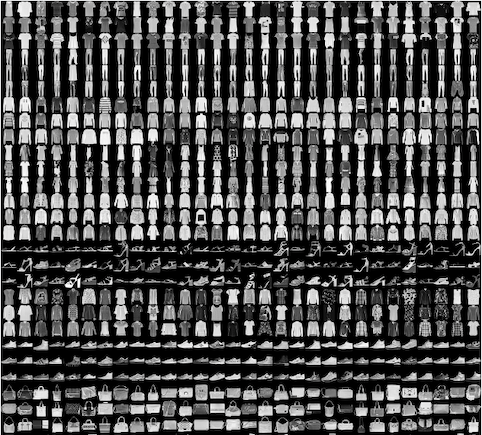

In [2]:
!pip install tensorflow

In [4]:
# Step 1: 導入所需的模組
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Step 2: 加載 Fashion-MNIST 數據集
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
# Step 3: 數據預處理
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

In [7]:
# Step 4: 將標籤轉換為 one-hot 編碼
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [8]:
# Step 5: 構建 CNN 模型
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Step 6: 編譯模型
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
# Step 7: 訓練模型
model.fit(train_images, train_labels, epochs=10, batch_size=64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 65s 67ms/step - accuracy: 0.7250 - loss: 0.7469
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 65ms/step - accuracy: 0.8783 - loss: 0.3383
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 61s 65ms/step - accuracy: 0.8956 - loss: 0.2838
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 62s 66ms/step - accuracy: 0.9082 - loss: 0.2438
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 60s 64ms/step - accuracy: 0.9186 - loss: 0.2189
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 64ms/step - accuracy: 0.9276 - loss: 0.1950
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 66ms/step - accuracy: 0.9356 - loss: 0.1749
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 85s 69ms/step - accuracy: 0.9415 - loss: 0.1538
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 66ms/step - accuracy: 0.9506 - loss: 0.1342
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 66ms/step - accuracy: 0.9548 - loss: 0.1239


In [12]:
# Step 8: 評估模型
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9089 - loss: 0.2908
Test accuracy: 0.910099983215332


In [13]:
# Step 9: 預測結果
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


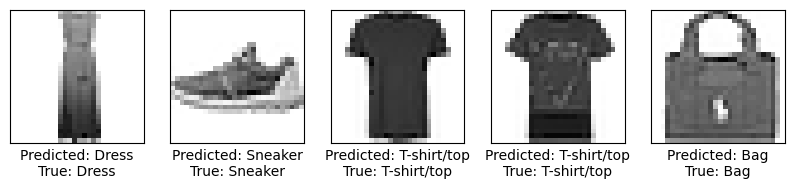

In [15]:
# Step 10: 隨機選擇圖片並顯示
# 使用 matplotlib 來顯示隨機選取的圖片
def display_random_images(num_images=5):
    random_indices = np.random.choice(test_images.shape[0], num_images, replace=False)
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

    plt.figure(figsize=(10, 5))
    for i, index in enumerate(random_indices):
        plt.subplot(1, num_images, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(test_images[index].reshape(28, 28), cmap=plt.cm.binary)

        predicted_label = np.argmax(predictions[index])
        true_label = np.argmax(test_labels[index])
        plt.xlabel(f"Predicted: {class_names[predicted_label]}\nTrue: {class_names[true_label]}")
    plt.show()

# 顯示隨機選擇的5張圖片
display_random_images(5)